In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Ignore the warings

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [3]:
df = pd.read_csv('mushrooms.csv')

## Exploratory Data Analysis

Show me the top 5 result

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


- What's there in the dataset?

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


- Any missing Values?

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No missing value YET. Let's check the object types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Seems all OK, but the columns are having '-' in between the words, let's change

In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('-','_')

In [9]:
df

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


better now to see the column names with '_'.

What's there in each column?

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique())

class
['p' 'e']
cap_shape
['x' 'b' 's' 'f' 'k' 'c']
cap_surface
['s' 'y' 'f' 'g']
cap_color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill_attachment
['f' 'a']
gill_spacing
['c' 'w']
gill_size
['n' 'b']
gill_color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk_shape
['e' 't']
stalk_root
['e' 'c' 'b' 'r' '?']
stalk_surface_above_ring
['s' 'f' 'k' 'y']
stalk_surface_below_ring
['s' 'f' 'y' 'k']
stalk_color_above_ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk_color_below_ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil_type
['p']
veil_color
['w' 'n' 'o' 'y']
ring_number
['o' 't' 'n']
ring_type
['p' 'e' 'l' 'f' 'n']
spore_print_color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


Found '?' stalk_root, which is not useful to have it in dataset, will check the count

In [11]:
df[df['stalk_root'] == '?'].stalk_root.value_counts()

?    2480
Name: stalk_root, dtype: int64

OH! the count is huge, can't drop it merely. What's next?


replace '?' with np.nan for now

In [12]:
df['stalk_root'] = df['stalk_root'].replace('?', np.nan)

In [13]:
df.isnull().sum()

class                          0
cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
dtype: int64

Now, Fill the na with best mode of the stalk_root

In [14]:
df['stalk_root'].fillna(df['stalk_root'].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

WOW! No missing values in the dataset

## Feature Importance Analysis

All the columns are categortical, so we are using mutual_info_score to get the correlation between the features

In [16]:
features = df.columns
print(features)

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')


In [17]:
df['class'] = (df['class'] == 'p').astype(int)

In [18]:
df

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [19]:
from sklearn.metrics import mutual_info_score

In [20]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df['class'])

In [21]:
df_p = df.drop('class', axis=1)

In [22]:
mi = df_p.apply(mutual_info_churn_score)
mi_score = mi.sort_values(ascending=False)
round(mi_score, 2)

odor                        0.63
spore_print_color           0.33
gill_color                  0.29
ring_type                   0.22
stalk_surface_above_ring    0.20
stalk_surface_below_ring    0.19
stalk_color_above_ring      0.18
stalk_color_below_ring      0.17
gill_size                   0.16
population                  0.14
bruises                     0.13
habitat                     0.11
stalk_root                  0.08
gill_spacing                0.07
cap_shape                   0.03
ring_number                 0.03
cap_color                   0.02
cap_surface                 0.02
veil_color                  0.02
gill_attachment             0.01
stalk_shape                 0.01
veil_type                   0.00
dtype: float64

Below are contributing less to the target column

- cap_shape                   0.03
- ring_number                 0.03
- cap_color                   0.02
- cap_surface                 0.02
- veil_color                  0.02
- gill_attachment             0.01
- stalk_shape                 0.01
- veil_type                   0.00


Convert all the categorical values to numerical one to calculate the correlation

In [23]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [24]:
for col in df.columns:
    df[col] = encode.fit_transform(df[col]).astype("float32")

In [25]:
df

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0.0,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1.0,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   float32
 1   cap_shape                 8124 non-null   float32
 2   cap_surface               8124 non-null   float32
 3   cap_color                 8124 non-null   float32
 4   bruises                   8124 non-null   float32
 5   odor                      8124 non-null   float32
 6   gill_attachment           8124 non-null   float32
 7   gill_spacing              8124 non-null   float32
 8   gill_size                 8124 non-null   float32
 9   gill_color                8124 non-null   float32
 10  stalk_shape               8124 non-null   float32
 11  stalk_root                8124 non-null   float32
 12  stalk_surface_above_ring  8124 non-null   float32
 13  stalk_surface_below_ring  8124 non-null   float32
 14  stalk_co

In [27]:
df.corr()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap_shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap_surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap_color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill_attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill_spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill_size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill_color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

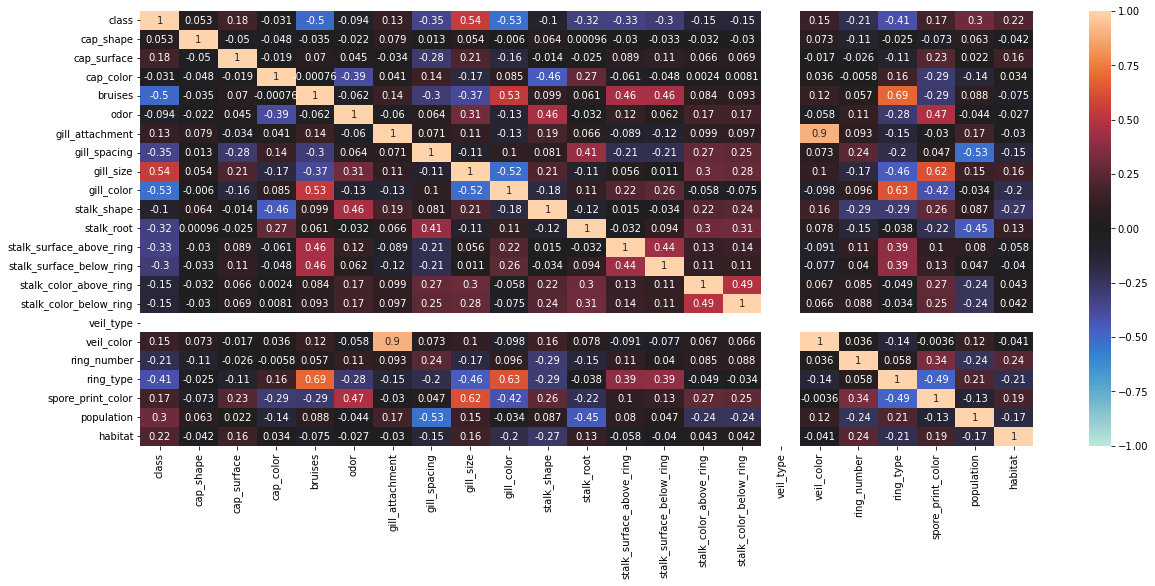

In [28]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),vmin=-1,center=0,vmax=1,annot=True)

Both the method says, **veil_type** has no effect on the result, so we can drop this column

In [29]:
df.drop("veil_type",inplace=True,axis=1)

# New Features
features = df.columns


In [30]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [31]:
df.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794683,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229872,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907292,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Target variable analysis

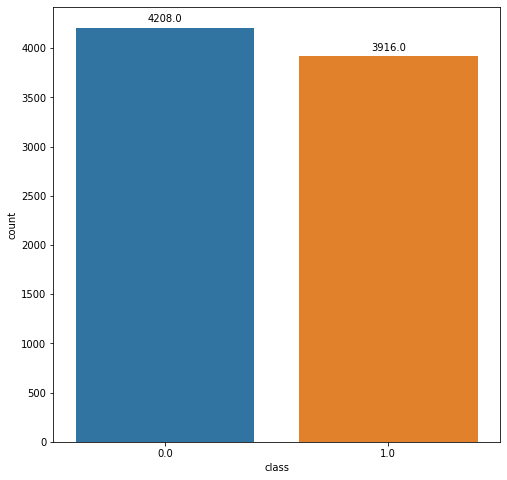

In [32]:
plt.rcParams['figure.figsize']=8,8 
s = sns.countplot(x = "class", data = df)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

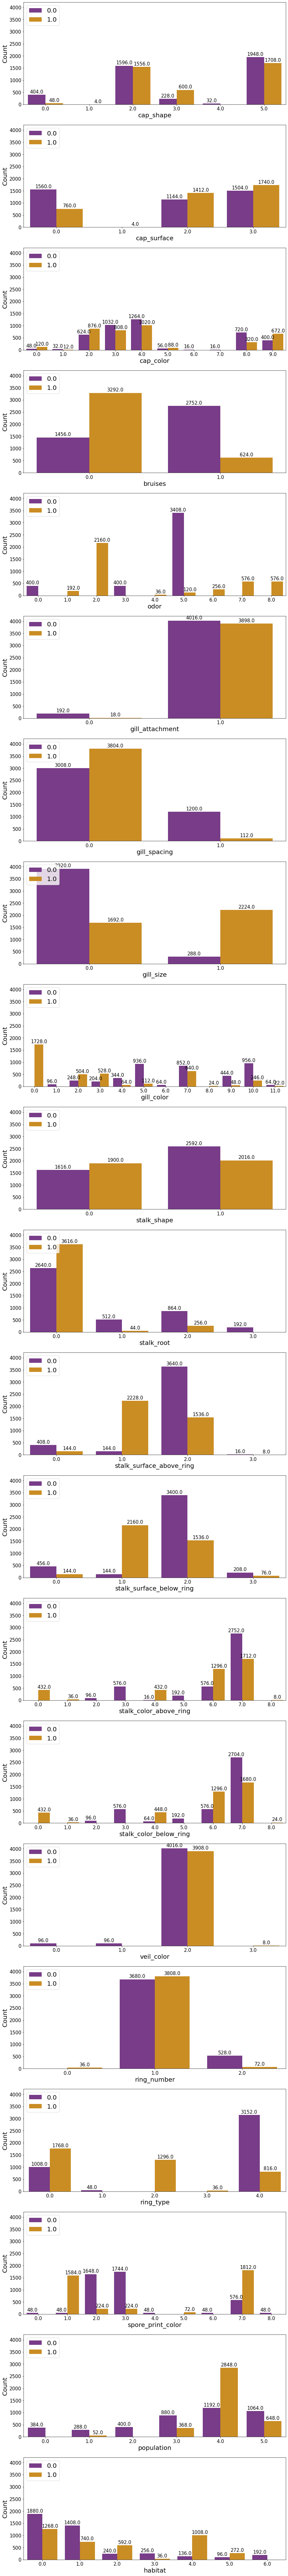

In [33]:
f, axes = plt.subplots(21,1, figsize=(15,150), sharey = True) 
k = 1
for i in range(0,len(features)-1):
    s = sns.countplot(x = features[k], data = df, hue = 'class', ax=axes[i], palette = 'CMRmap')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    axes[i].legend(loc=2, prop={'size': 20})
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')

# Train the model

Split the data into 3 parts namely df_train,df_test and df_val

In [34]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Prepare the target values
y_train = df_train['class'].values
y_val = df_val['class'].values
y_test = df_test['class'].values

# Reset the index of the subaset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Delete the target variable from training set
del df_train['class']
del df_val['class']
del df_test['class']

### Encoding the categrical features

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [36]:
dv = DictVectorizer()

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Model - 1: Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict_proba(X_val)[:,1]

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [41]:
accuracy_score(y_val, y_pred > 0.5)

0.9483076923076923

In [42]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

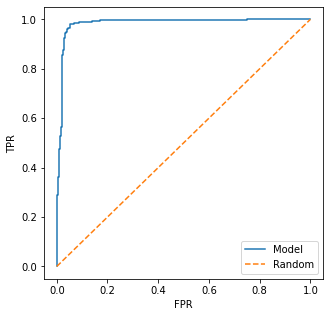

In [43]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [44]:
auc_score = roc_auc_score(y_val, y_pred)
auc_score

0.9830907982271729

## Cross-Validation

- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

In [45]:
from sklearn.model_selection import KFold

In [46]:
def train(df_train_1, y_train_1, C=1.0):
    dicts = df_train_1.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train_1 = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train_1, y_train_1)
    
    return dv, model

In [47]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred_1 = model.predict_proba(X)[:, 1]

    return y_pred_1

In [48]:
n_splits = 5

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_1 = df_full_train.iloc[train_idx]
        df_val_1 = df_full_train.iloc[val_idx]

        y_train_1 = df_train_1['class'].values
        y_val_1 = df_val_1['class'].values

        dv, model = train(df_train_1, y_train_1, C=C)
        y_pred_1 = predict(df_val_1, dv, model)

        auc = roc_auc_score(y_val_1, y_pred_1)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.001 0.955 +- 0.007
C=0.01 1.000 +- 0.000
C=0.1 1.000 +- 0.000
C=0.5 1.000 +- 0.000
C=1 1.000 +- 0.000
C=5 1.000 +- 0.000
C=10 1.000 +- 0.000


## Run the model logistics regression

In [49]:
lr = LogisticRegression(C=1.0)
lr.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = lr.predict(X_val)

In [51]:
# Making the confusion matrix and calculating accuracy score
acscore = []
cm = confusion_matrix(y_val, y_pred)
ac = accuracy_score(y_val, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[814  28]
 [ 56 727]]
0.9483076923076923


## Model - 2: DecisionTreeClassifier

In [52]:
# Training the Decision Tree Classification on the Training set
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
Dt.fit(df_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
# Predicting the test set 
y_pred = Dt.predict(X_val)

In [54]:
# Making the confusion matrix and calculating the accuracy score
cm = confusion_matrix(y_val, y_pred)
ac = accuracy_score(y_val, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[231 611]
 [223 560]]
0.4867692307692308


## Performance Tuning

In [55]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.785
   2 -> 0.903
   3 -> 0.979
   4 -> 0.991
   5 -> 0.995
   6 -> 0.999
  10 -> 1.000
  15 -> 1.000
  20 -> 1.000
None -> 1.000


In [56]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [57]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [58]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.991  0.995  0.999
5                 0.991  0.995  0.999
10                0.991  0.995  0.999
15                0.991  0.995  0.999
20                0.990  0.995  0.999
100               0.990  0.993  0.993
200               0.984  0.984  0.984
500               0.913  0.913  0.913

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

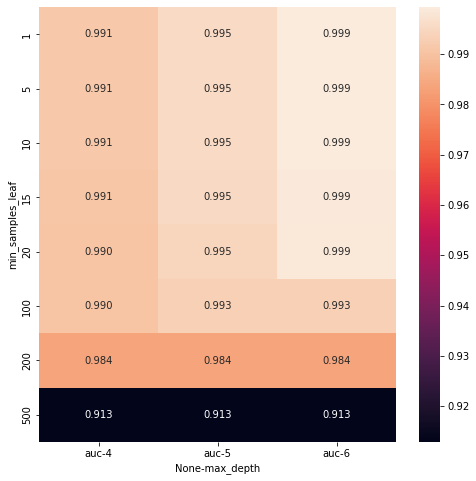

In [59]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [60]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [61]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.9993455040756212

## Model - 3: XGBoost classifier

In [63]:
# Training the XGBoost Classification on the Training set
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

[19:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
# Predicting the test set
y_pred = xgb_model.predict(X_val)

In [65]:
# Making the confusion matrix and calculating the accuracy score
cm = confusion_matrix(y_val, y_pred)
ac = accuracy_score(y_val, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[842   0]
 [  0 783]]
1.0


## Model - 4: RandomForestClassifier

Identify the n_estimators

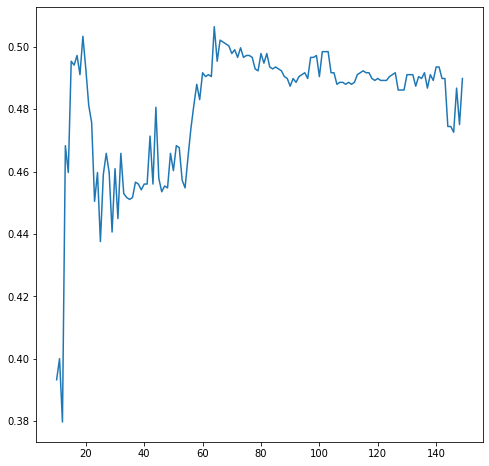

In [66]:
# Finding the optimum number of n_estimators
from sklearn.ensemble import RandomForestClassifier
list1 = []
for estimators in range(10,150):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(df_train, y_train)
    y_pred = classifier.predict(df_val+df_test)
    list1.append(accuracy_score(y_test+y_val,y_pred))
plt.plot(list(range(10,150)), list1)
plt.show()

When n_estimators = 100, model gives better result, so will use that 

In [67]:
# Training the Random Forest Classification on the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', random_state = 0, n_estimators = 65)
rf.fit(df_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=65, random_state=0)

In [68]:
# Predicting the test set
y_pred = rf.predict(df_test)

In [69]:
# Making the confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[820   0]
 [  0 805]]
1.0


In [70]:
acscore

[0.9483076923076923, 0.4867692307692308, 1.0, 1.0]

In [71]:
models = ['LogisticRegression','DecisionTree','XGBoost','RandomForest']

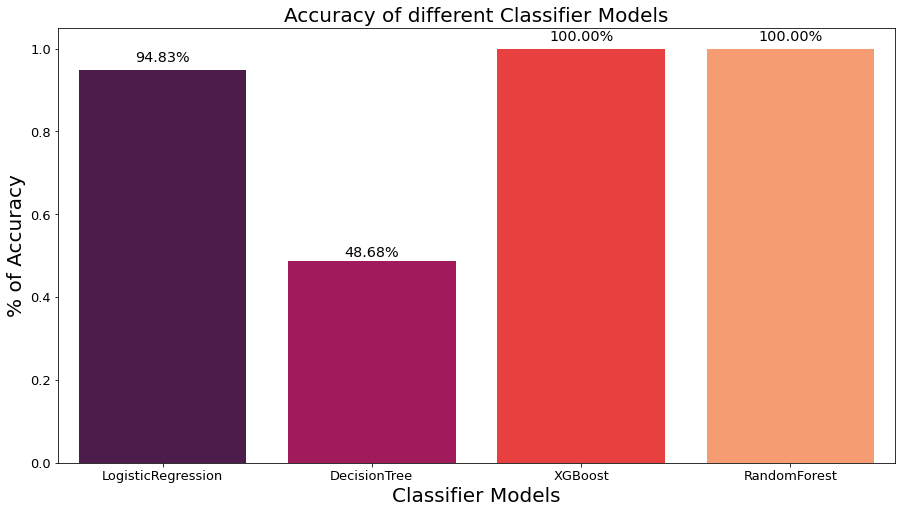

In [72]:
# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15,8 
ax = sns.barplot(x=models, y=acscore, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

XGBoost and RandomForest gives same result and will use the **RandomForestClassifier** as ou final model